# Machine Learning Project

### Title: Smartphone Price Classification

### Introduction to problem statement:
**In the competitive smartphone market, new company like Uncle Joe does not know how to estimate price of smartphones. Investigating the market trend is required to understand sales data of smartphones and features of smartphones that drive its selling prices.**

### Project objectives:
* **1) To find the relation between features of smartphone (eg:- RAM, Internal Memory, etc) and its selling price.**
* **2) To develop 3 classification algorithms for model accuracy comparison.**
* **3) To evaluate performance of selected model based on performance metrics.**
* **4) To predict the price range of smartphones based on the features.**

# Import libraries

In [70]:
# Import import libraries
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline

# Model
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [71]:
# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

# Upload dataset file

In [72]:
# upload csv file into Pandas dataframe
smartphone_data = pd.read_csv('smartphone_data.csv')

# Read the data

In [73]:
# read first 5 rows
smartphone_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [74]:
# check the shape of data
print(smartphone_data.shape)
print(f'Total Rows = {smartphone_data.shape[0]}\nTotol Columns={smartphone_data.shape[1]} ')

(2000, 21)
Total Rows = 2000
Totol Columns=21 


# Data pre-processing

##      Data Cleaning

In [75]:
# check the datatypes, non-null values
smartphone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

* **There is no object data type in the data set.**
* **There are zero null values in data set.**
* **Price_range is our target variable.**

In [76]:
# check if contains null or missing values
smartphone_data.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [77]:
# display sum of null or missing values
smartphone_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, 'Missing Value in Smartphone Data')

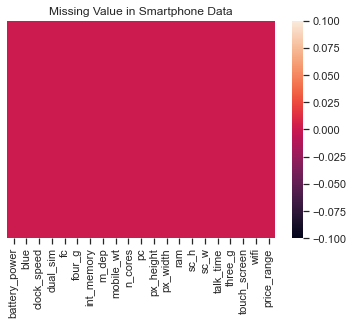

In [78]:
# plot the heatmap of missing value
sns.heatmap(smartphone_data.isnull(), yticklabels=False)
plt.title("Missing Value in Smartphone Data")

* **Since there is no data point indicated in white colour (showing that null values exist), no null values is fuond in the data set.**

In [79]:
# remove duplicated data
smartphone_data = smartphone_data.drop_duplicates()
smartphone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [80]:
# print number of duplicated values
print(f' There are {smartphone_data.duplicated().sum()} duplicate values in dataset.')

 There are 0 duplicate values in dataset.


In [81]:
smartphone_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Data Analysis and Visualization

In [82]:
# check data statistics
stats = smartphone_data.describe()
stats

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [83]:
# check target variable's counts
price_range_values=smartphone_data['price_range'].value_counts()
price_range_values

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:ylabel='price_range'>

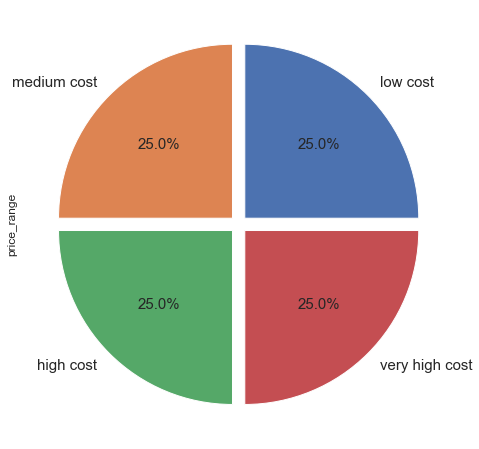

In [84]:
# visualize target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart

* **The target variables are equal distributed among each category.**
* **Thus, data imbalanced is not a concern in this case. There is no need of oversampling or undersampling the data.** 
* ***Accuracy score*** **will be the best evaluation metric to select the model.**

**The target variable is price_range with value of**
* **0 = low cost**
* **1 = medium cost**
* **2 = high cost**
* **3 = very high cost**

## Correlation of Target Variable

In [85]:
# find the pairwise correlation of all columns
smartphone_data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


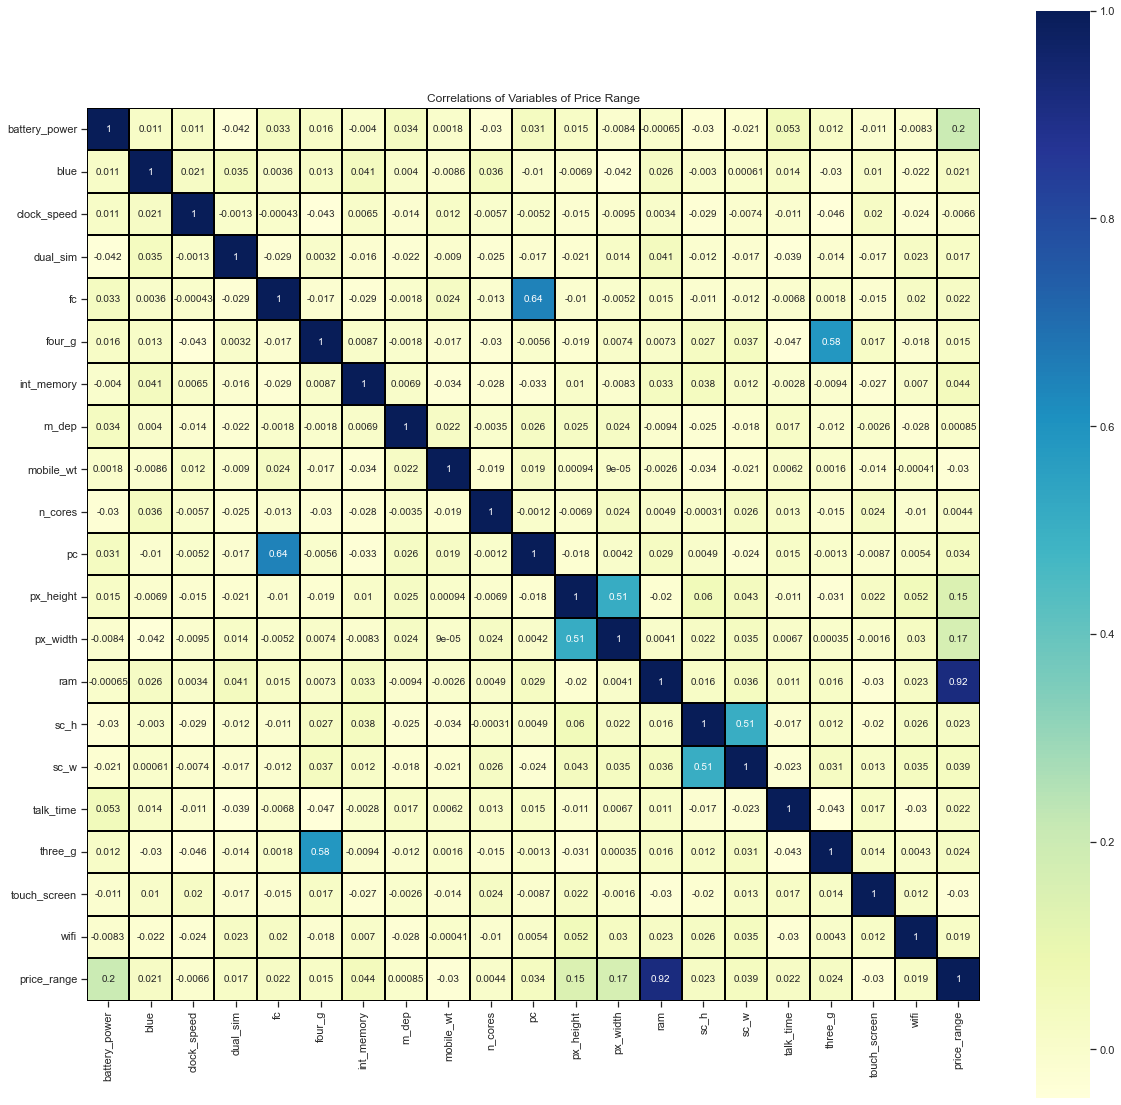

In [86]:
plt.subplots(figsize = (20,20))
sns.heatmap(smartphone_data.corr(), linewidths = 0.2, linecolor = 'black', vmax = 1.0, square = True, cmap = 'YlGnBu', annot = True)
plt.title('Correlations of Variables of Price Range')
plt.show()

### **Explanation:**
* **RAM has strong positive correlation with the price_range (correlation value = 0.92). Thus, RAM increases in relation with increase of price range.**
* **Battery_power also has positive correlation with the price range (correlation value = 0.2). Generally, smartphone with high price range has good battery power.**

* **Also, px_height and px_width (Pixel Resolution Height and width) are positively correlated with price-range (correlation value of 0.15 and 0.17 respectively). Generally, high price range smartphones have good resolutions.**
* **Four_g and Three_g are highly positvely correlated with each other (correlation value = 0.58). Since most of the smartphones has both type of options nowdays, this could be the reason that they are correlated.**
* **pc (primary camera) and fc (front camera) are positively correlated with value of 0.64.**
* **sc_h and sc_w are positively correlated with value of 0.51.**

## Relation between significant features and price_range in Histogram

**Significant features affecting price-range: RAM, battery_power, px_height, px_width**

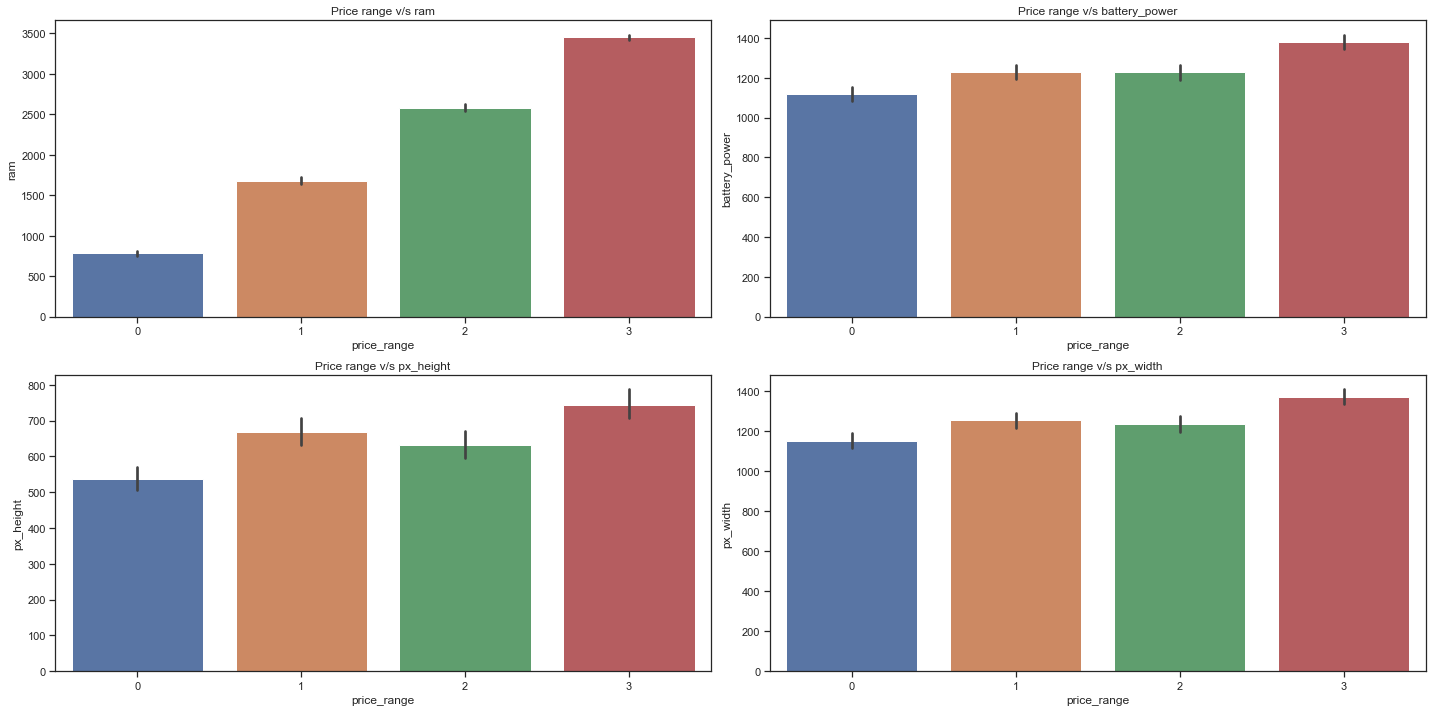

In [87]:
# plot  price_range vs other features
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=smartphone_data['price_range'],y=smartphone_data[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

### **Explanation:**
* **Smartphones having RAM more than 3000MB falls under "very high cost" category. As RAM increases, price range increases.**
* **Smartphones having RAM less than 1000 MB falls under "low cost category".**
* **Smartphones with battery power more than 1300 mAh has very high cost while battery power between 1200 and 1300 mAH falls under "medium" and "high cost" category.**
* **Samrtphones with more than 700 pixel height and width more than 1300 has very high cost.**

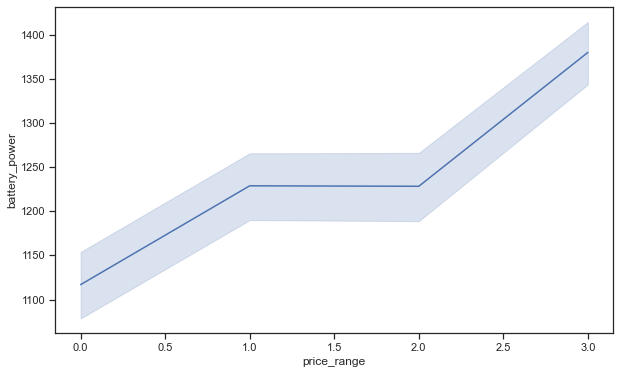

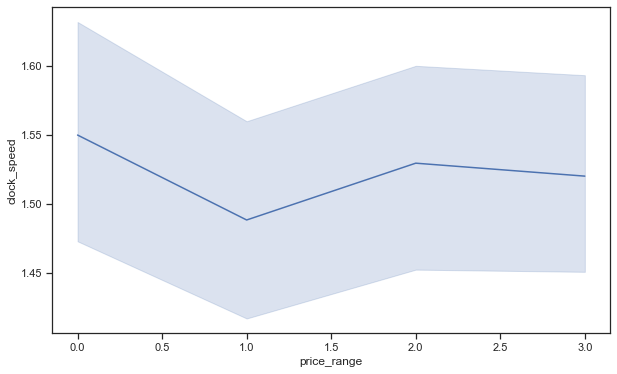

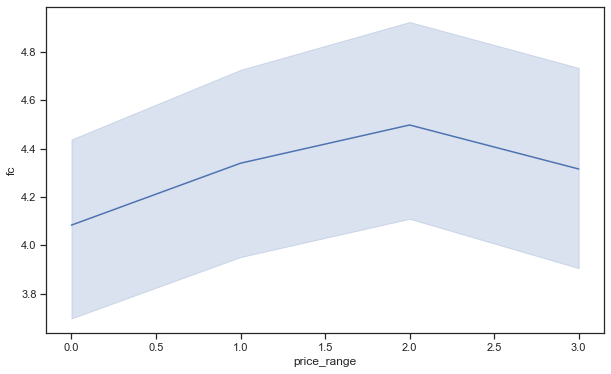

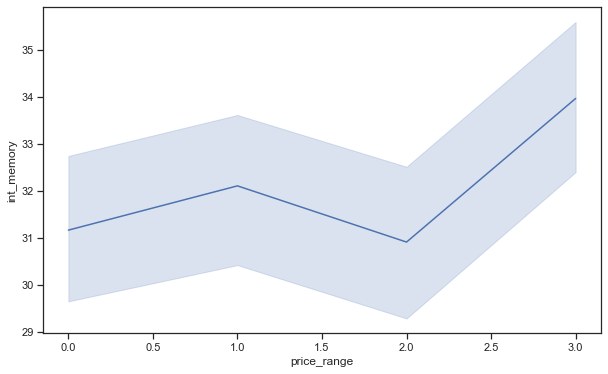

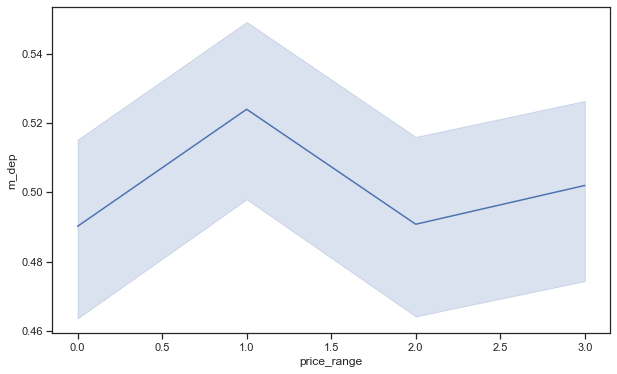

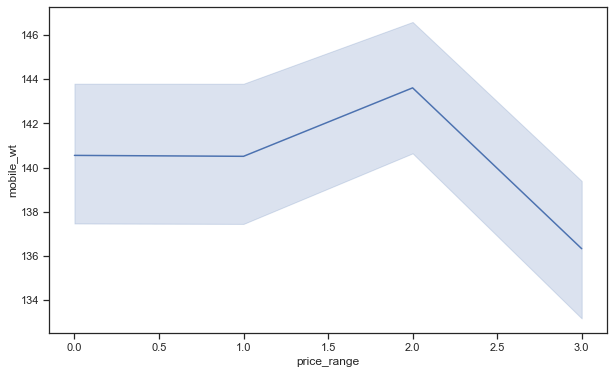

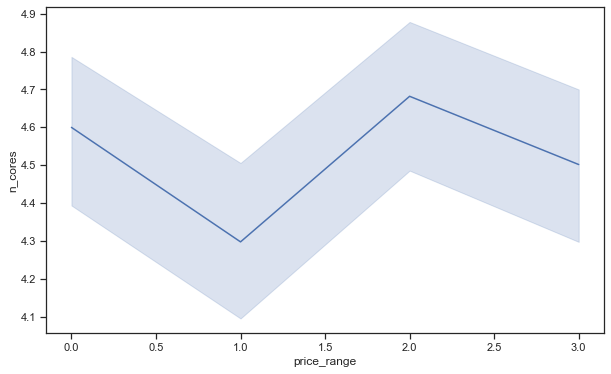

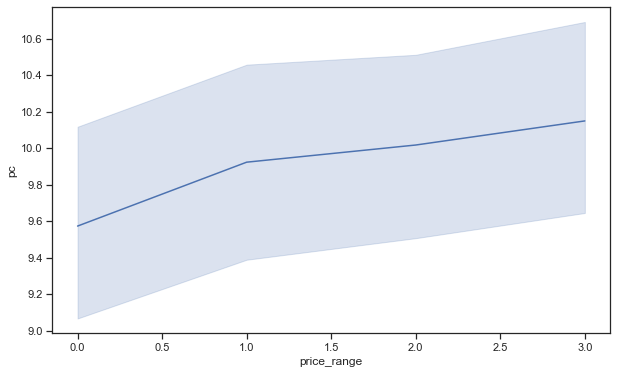

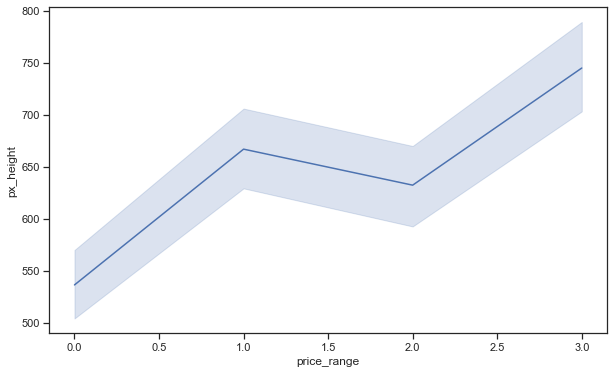

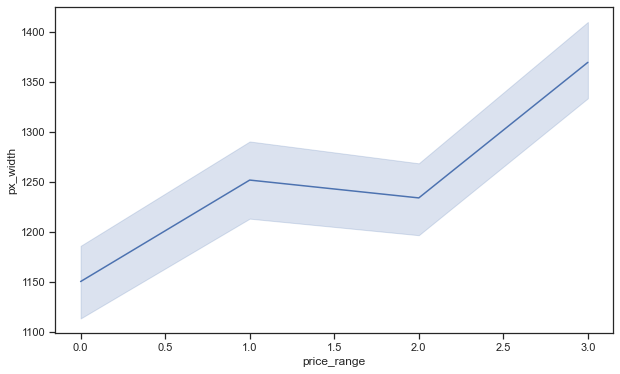

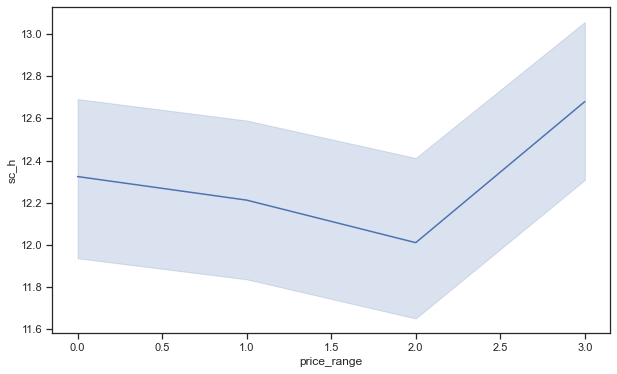

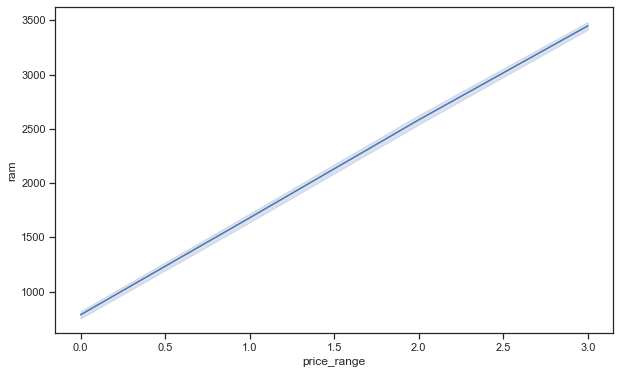

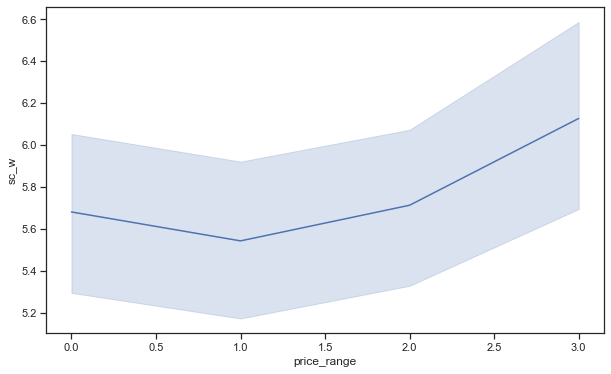

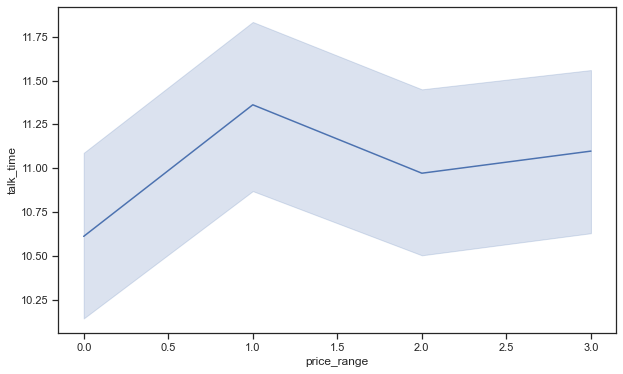

In [88]:
list_feat=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']

# plotting boXplot and distribution
counter=1
for var in list_feat:
    plt.figure(figsize=(10,6))
    
    sns.lineplot(x=smartphone_data['price_range'],y=smartphone_data[var])


### **Explanation:**
* **For price range 1 (medium) and range 2 (high), battery power range is almost similar. Overall, battery power increases, price range increases.**
* **Smartphones in "very high" price range (range 3) has less weight compared to other classes. As weight of smartphones decrease, price increases.**
* **Smartphones having max screen height and width falls in "very high" price category. In linechart of sc_width and sc_height from range 2 (high), screen width and hieght starts increasing with price range. Similar case is with px_height and px_width. As resolution of screen increases, price range increases**
* **RAM has clear relationship with price range, linearly increasing.**

## Data Splitting

**Model validation method used is train-test split to improve generalisation of the model when perform with new data by reducing overfitting on the data set.**

In [89]:
# splitting data into train and test data
X = smartphone_data.drop(columns=['price_range'])
y = smartphone_data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**Data set is split into "Features" represented by X_train, X_test and "Target" represented by y_train, y_test. Random sampling without replacement is performed, putting 75% of data into train set and remaining 25% into test set.**

## Normalization

In [90]:
#Normalize 
X_train = X_train.apply(lambda X: (X - X.min()) / (X.max() - X.min()))
X_test = X_test.apply(lambda X: (X - X.min()) / (X.max() - X.min()))
print("Min")
print(X.min())
print()
print("Max")
print(X.max())

Min
battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
dtype: float64

Max
battery_power    1998.0
blue                1.0
clock_speed         3.0
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         64.0
m_dep               1.0
mobile_wt         200.0
n_cores             8.0
pc                 20.0
px_height        1960.0
px_width         1998.0
ram              3998.0
sc_h               19.0
sc_w               18.0
talk_time          20.0
three_g             1.0
touch_screen        1.0
wifi                1.0
dtype: float64


# Model Training
Classification algorithms used for modeling:
* 1) Logistic Regression
* 2) Decision Tree
* 3) Random Forest classifier

In [96]:
# define a function for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);  

In [97]:
# create a class list
class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

## Logistic Regression Model Algorithms

In [98]:
# create object of Logistic Regression model
lr_model = LogisticRegression(random_state=0)

# fit the model to the train data
lr_model.fit(X_train, y_train)

# predict y values of test data
lr_pred = lr_model.predict(X_test)

## Logistic Regression Model Visualization

In [99]:
# confusion matrix for test set
cf_matrix = confusion_matrix(y_test,lr_pred)
cf_matrix

array([[123,   3,   0,   0],
       [  5, 103,  10,   0],
       [  0,  10, 111,   7],
       [  0,   0,   4, 124]], dtype=int64)

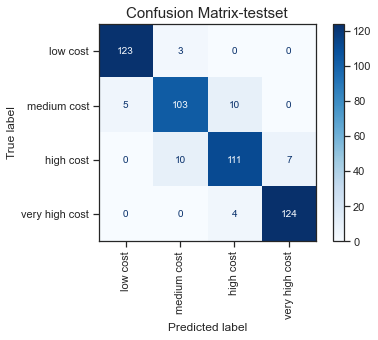

In [100]:
# plot confusion matrix for test set
plot_confusion_matrix(lr_model,X_test,y_test,cmap='Blues',display_labels=class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

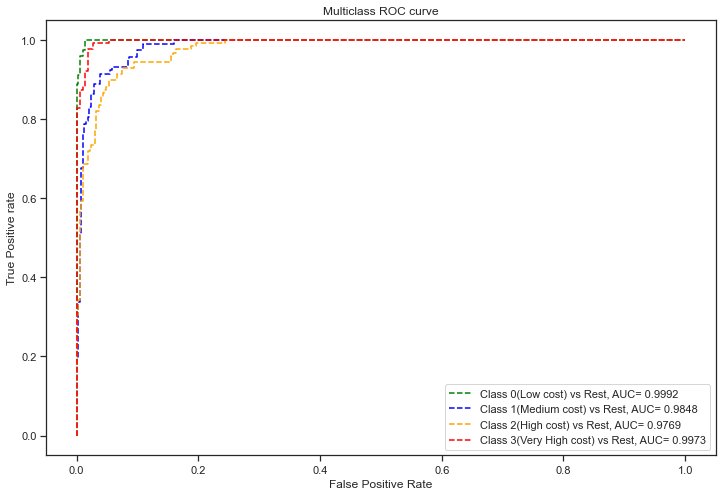

In [101]:
# plot AUC ROC curve
pred_prob = lr_model.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

## Logistic Regression Model Evaluation

In [102]:
# compare train and test set
lr_score=round(lr_model.score(X_train, y_train),10)
lr_testSc=round(lr_model.score(X_test, y_test),10)
print('Logistic Regression Train Score: ', lr_score)
print('Logistic Regression Test Score: ', lr_testSc)

Logistic Regression Train Score:  0.94
Logistic Regression Test Score:  0.922


In [103]:
# calculate and print accuaracy of the model
lr_accuracy=accuracy_score(y_test, lr_pred)
print("Accuracy: ", lr_accuracy)

Accuracy:  0.922


In [104]:
# print the classification report for test set
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       126
           1       0.89      0.87      0.88       118
           2       0.89      0.87      0.88       128
           3       0.95      0.97      0.96       128

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



**Limitation of result:**

* **Train set accuracy is 94% and test accuracy is 91%.**
* **Model is quite generalised and not overfitted on train set.**
* **This model is potentially good to be used.**
* **Hyperparamters tuning is required to reduce overfitting and improve the model performance.**

## Decision Tree Model Algorithms

In [105]:
# create object of the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)

# fit the model to the train data
dt_model.fit(X_train, y_train)

# predict y values of test data
dt_pred = dt_model.predict(X_test)

## Decision Tree Model Visualization

## DecisionTree Model Visualization

In [106]:
# confusion matrix for test set
cf_matrix = confusion_matrix(y_test,dt_pred)
cf_matrix

array([[112,  14,   0,   0],
       [ 10,  95,  13,   0],
       [  0,  19,  97,  12],
       [  0,   0,  19, 109]], dtype=int64)

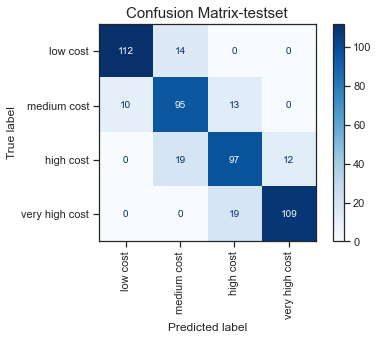

In [107]:
# plot confusion matrix for test set
plot_confusion_matrix(dt_model,X_test,y_test,cmap='Blues',display_labels=class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

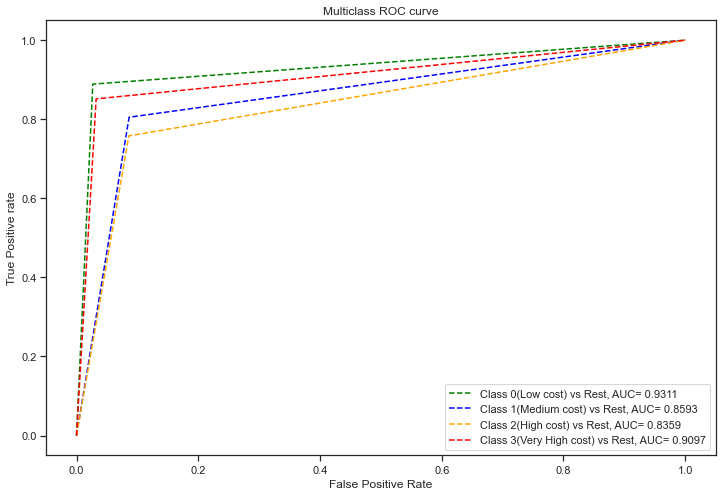

In [108]:
# plot AUC ROC curve
pred_prob = dt_model.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

## DecisionTree Model Evaluation

In [109]:
# compare train and test set 
dt_score=round(dt_model.score(X_train, y_train),10)
dt_testSc=round(dt_model.score(X_test, y_test),10)
print('Random Forest Train Score: ', dt_score)
print('Random Forest Test Score: ', dt_testSc)

Random Forest Train Score:  1.0
Random Forest Test Score:  0.826


In [110]:
# calculate and print accuracy of the model
dt_accuracy = accuracy_score(y_test,dt_pred)
print("Accuracy: ", dt_accuracy)

Accuracy:  0.826


In [111]:
# print classification of test set
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       126
           1       0.74      0.81      0.77       118
           2       0.75      0.76      0.75       128
           3       0.90      0.85      0.88       128

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



**Limitation of result:**

* **Train set accuracy is 100% and test accuracy is 82%.**
* **Model is overfitted on train set and did not generalised well.**
* **This model is not a good fit.**
* **Hyperparamters tuning is required to reduce overfitting and improve the model performance.**

## Random Forest Model Algorithms

In [112]:
# create an object of the classifier
rf_model = RandomForestClassifier(random_state=0)

# fit and train the model
rf_model.fit(X_train, y_train)

# predict the y values of test set
rf_pred = rf_model.predict(X_test)

## Random Forest Model Visualization

In [113]:
# confusion matrix for test set
cf_matrix = confusion_matrix(y_test,rf_pred)
cf_matrix

array([[119,   7,   0,   0],
       [  6, 100,  12,   0],
       [  0,  19, 100,   9],
       [  0,   0,  13, 115]], dtype=int64)

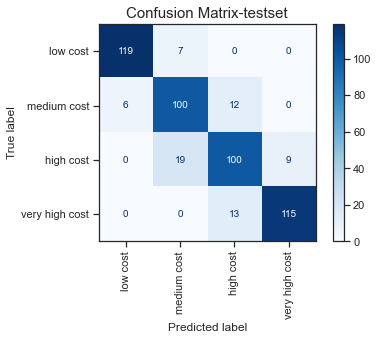

In [114]:
# plot confusion matrix for test set
plot_confusion_matrix(rf_model,X_test,y_test,cmap='Blues',display_labels=class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

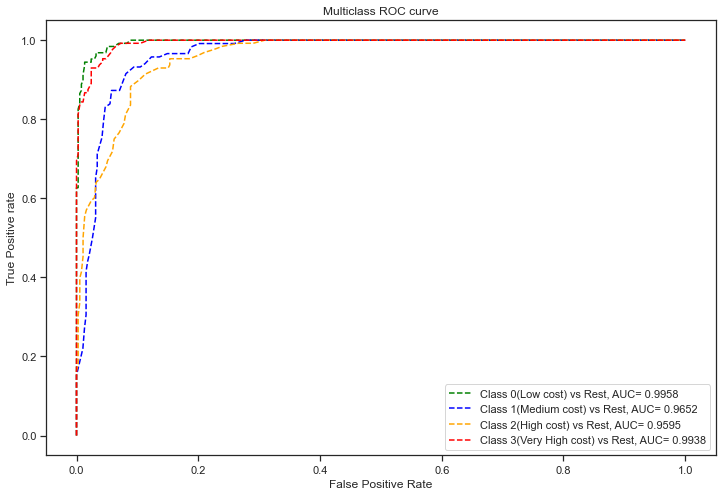

In [115]:
# plot AUC ROC curve.
pred_prob = rf_model.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

Text(0, 0.5, 'Feature Names')

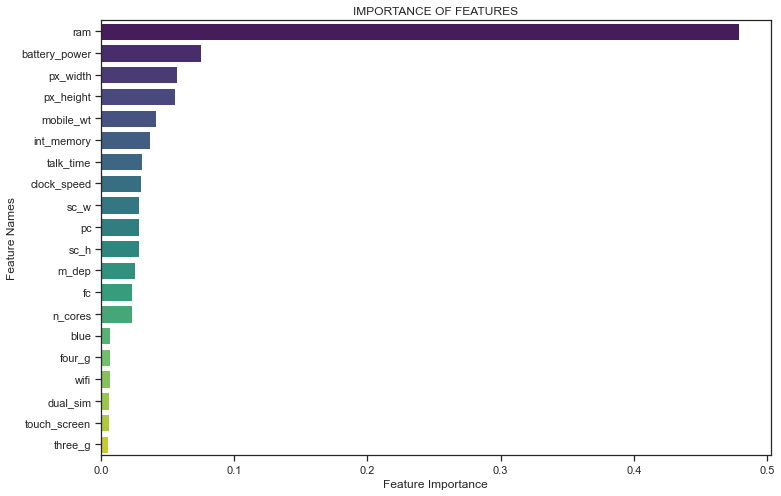

In [116]:
# Creating arrays to store feature names and  feature importance values.
feature_importance = np.array(rf_model.feature_importances_)
feature_names = np.array(X_train.columns)

# Constructing a DataFrame using a dictionary.
data = {'feature_names': feature_names, 'feature_importance': feature_importance}
fi_df = pd.DataFrame(data)

# Sorting the DataFrame in descending order of feature importance.
fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Setting the size of the bar plot.
plt.figure(figsize=(12, 8))

# Creating a Seaborn bar chart.
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette='viridis')

# Adding labels to the chart.
plt.title('IMPORTANCE OF FEATURES')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

## Random Forest Model Evaluation

In [117]:
# compare train and test set
rf_score=round(rf_model.score(X_train, y_train),10)
rf_testSc=round(rf_model.score(X_test, y_test),10)
print('Random Forest Train Score: ', rf_score)
print('Random Forest Test Score: ', rf_testSc)

Random Forest Train Score:  1.0
Random Forest Test Score:  0.868


In [118]:
# calculate and print accuracy of the model
rf_accuracy=accuracy_score(y_test,rf_pred)
print("Accuracy: ", rf_accuracy)

Accuracy:  0.868


In [119]:
# print the classification report for test set.
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       126
           1       0.79      0.85      0.82       118
           2       0.80      0.78      0.79       128
           3       0.93      0.90      0.91       128

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



**Limitation of result:**

* **Train set accuracy is 100% and test accuracy is 88%.**
* **Model is overfitted on train set and did not generalised well.**
* **This model is not a good fit.**
* **Hyperparamters tuning is required to reduce overfitting and improve the model performance.**

# All Models Evaluation

In [120]:
Models = pd.DataFrame({
    'Model': [  'Logistic Regression','Decision Tree','Random Forest'],
    'Score': [  lr_score, dt_score,rf_score],
    'Test Score': [ lr_testSc, dt_testSc,rf_testSc],
    'Accuracy':[lr_accuracy,dt_accuracy,rf_accuracy]})
Models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score,Accuracy
0,Logistic Regression,0.94,0.922,0.922
2,Random Forest,1.00,0.868,0.868
1,Decision Tree,1.00,0.826,0.826


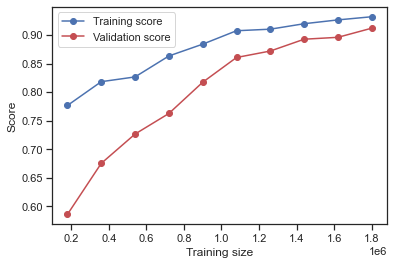

In [121]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lr_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_sizes_abs = np.round(train_sizes * len(X_train))

plt.plot(train_sizes_abs, np.mean(train_scores, axis=1), 'bo-', label='Training score')
plt.plot(train_sizes_abs, np.mean(test_scores, axis=1), 'ro-', label='Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Save the best model

In [125]:
# save the model info a file call smartphone_model.sav
fitted_lr_model = lr_model.fit(X_train, y_train)
filename = "smartphone_model.sav"
pk.dump(fitted_lr_model, open(filename, 'wb'))

# Prediction

In [126]:
# example of input data
input_data = [[600,1,1.2,0,8,0,25,1.5,130,6,15,990,1500,1599,15,2,20,0,1,1]]

In [127]:
# input data into the saved best prediction model
Prediction_Model = joblib.load('smartphone_model.sav')
predictions = Prediction_Model.predict(input_data)
predictions

price_array = predictions

#print predicted price range of smartphone
for value in price_array:
    if value==0:
        print(f"{value} (low price)")
    if value==1:
        print(f"{value} (medium price)")
    if value==2:
        print(f"{value} (high price)")
    if value==3:
        print(f"{value} (very high price)")
    else:
        print("Error occured")

3 (very high price)
